# Group Project Machine Learning

Belinda Mutiara - 2540119596 <br>
Evelyn Zefanya Rahardjo - 2540118914 <br>
Jasmine Mutia Alifa - 2502026873<br>

# Video

https://drive.google.com/drive/folders/1TdZ8pjRwUiJE-IsMIlaVddIh83Lw8Y0z?usp=sharing

# Poster

https://drive.google.com/drive/folders/1TdZ8pjRwUiJE-IsMIlaVddIh83Lw8Y0z?usp=sharing

# Laporan

https://drive.google.com/drive/folders/1TdZ8pjRwUiJE-IsMIlaVddIh83Lw8Y0z?usp=sharing

# Customer Churn Dataset

### Introduction
<p style='text-align: justify;'> Retensi pelanggan merupakan salah satu kunci performa utama bagi perusahaan berbasis pelanggan. Persaingan ketat  bisa saja terjadi antar perusahaan sejenis sebab pelanggan bebas memilih dari banyak penyedia. Satu hal pengalaman buruk yang dialami pelanggan memungkinkan pelanggan untuk berpindah kepada pesaing. Hal inilah yang dinamakan dengan "<i>customer churn</i>".</p>

### Customer Churn
<p style="text-align: justify">"<i>Customer churn</i>" adalah persentase pelanggan yang berhenti menggunakan produk atau layanan perusahaan selama jangka waktu tertentu. Memprediksi <i>Customer churn</i> merupakan hal yang penting terutama bagi perusahaan industri yang bergerak di bidang telekomunikasi, keuangan, dan sebagainya. Kemampuan memprediksi <i>Customer churn</i> merupakan hal yang penting bagi perusahaan, sebab dengan memprediksi hal tersebut, perusahaan masih memiliki waktu untuk melakukan sesuatu agar pelanggan tidak memberhentikan langganan. </p>


<p style="text-align: justify"> Retensi pelanggan dapat dicapai dengan menambahkan beberapa layanan dan produk yang baik, akan tetapi cara yang paling efektif adalah dengan benar-benar mengenal pelanggan. Jumlah data yang besar dikumpulkan menjadi sebuah data set untuk membuah permodelan tentang prediksi <i>customer churn</i>. Dengan mengetahui siapa yang paling mungkin untuk meninggalkan perusahaan, perusahaan dapat mengambil tindakan untuk mencegah pelanggan pergi.</p>


### Problem Statement
<p style="text-align: justify"> Kehilangan pelanggan karena persaingan merupakan masalah tersendiri bagi perusaahaan keuangan karena biaya untuk mendapatkan pelanggan baru sangat mahal dan oleh karena itu perusahaan ingin mempertahankan pelanggan mereka yang sudah ada.

### Mengapa hal ini penting untuk Bank?
- Biaya untuk menarik pelanggan baru bisa mencapai lima sampai enam kali lipat lebih mahal ketimbang mempertahankan pelanggan yang sudah ada.
- Pelanggan yang sudah bertahan lama menjadi lebih mudah dilayani, menghasilkan keuntungan yang lebih tinggi, serta dapat memberikan rekomendasi kepada calon pelanggan baru.
- Kehilangan pelanggan dalam hal ini nasabah dapat menyebabkan turunnya keuntungan bagi bank.

# Dataset Description


1. RowNumber : berisi nomor data (baris) dari dataset.
2. CustomerId : nilai unik ID pelanggan yang ada pada setiap pelanggan.
3. Surname : nama keluarga pelanggan, variabel kategorikal (rangkaian huruf)
4. CreditScore : skor kredit pelanggan, variabel numerik kontinu. pelanggan dengan skor kredit yang lebih tinggi cenderung meninggalkan bank.
5. Geography : negara yang terdaftar di akun pelanggan, variabel kategorikal.
6. Gender : jenis kelamin pelanggan, variabel kategori dalam dua kata 'Pria' atau 'Wanita'.
7. Age : umur pelanggan, variabel numerik diskrit.
8. Tenure : jumlah tahun selama menjadi nasabah bank, variabel numerik diskrit.
9. Balance : saldo keseluruhan di seluruh rekening yang dipegang oleh pelanggan, variabel numerik kontinu.
10. NumOfProducts: jumlah produk yang dibeli nasabah melalui bank, variabel numerik diskrit (lebih besar dari 0).
11. HasCrCard: mengacu pada apakah pelanggan memiliki kartu kredit atau tidak, variabel kategori yang mengambil nilai 1 = Ya dan 0 = Tidak.
12. IsActiveMember : indikasi pelanggan aktif atau tidak, variabel kategori yang mengambil nilai 1 = Ya dan 0 = Tidak.
13. EstimatedSalary : estimasi gaji tahunan pelanggan, variabel numerik kontinu.
14. Exited : indikasi pelanggan sudah churn (keluar) atau belum, variabel kategori yang mengambil nilai 1 = Ya dan 0 = Tidak.


# Load Libraries and Data Overview

## Load Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from lightgbm import LGBMClassifier, plot_importance
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, roc_curve

!pip install scikit-plot
import scikitplot as skplt
import math


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Code diatas dibuat dengan tujuan untuk meng-import beberapa library yang akan digunakan sebagai alat bantu dalam mnganalisis data.

## Data Overview

In [ ]:
#Mendifinikan variabel df (data frame) yang membaca data csv berjudul "CustomerChrun.csv".

df = pd.read_csv("https://raw.githubusercontent.com/belindamutiaraaaaa/data/main/CustomerChurn.csv")

In [ ]:
print(type(df))
row,column=df.shape

print("Jumlah baris data Customer Churn adlah ", row)
print("Jumlah kolom data Customer Churn adalah ", column)

<class 'pandas.core.frame.DataFrame'>
Jumlah baris data Customer Churn adlah  10000
Jumlah kolom data Customer Churn adalah  14


Data Customer Churn mempunyai 100000 baris, dan 14 kolom.

In [ ]:
print(df.columns.values)

['RowNumber' 'CustomerId' 'Surname' 'CreditScore' 'Geography' 'Gender'
 'Age' 'Tenure' 'Balance' 'NumOfProducts' 'HasCrCard' 'IsActiveMember'
 'EstimatedSalary' 'Exited']


Terdapat 14 kolom yaitu 'RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Disini bisa dilihat bawa setiap kolom mempunyai 10000 data.
Tipe data yang ada adalah float, integer, dan object.

In [ ]:
df.head(5)
#Melihat 5 data teratas

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Dari 5 data pertama kita dapat melihat bahwa :
- tiap customer punya CustomerID yang berbeda satu sama lain.
- Customer yang punya credit score paling banyak dari 5 data di atas ada pada rentang 600 an.
- Umur customer rata-rata 35-45 an.
- Balance customer ada yang 0.
- Kebanyakan customer active member, dan punya kartu kredit.
- Lebih banyak customer yang not churn dari pada churn.

In [ ]:
df.tail(5)
# Melihat 5 data terbawah

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


Dari 5 data terakhir kita dapat melihat bahwa :
- Gendernya kebanyakan male dari pada female.
- Number of product yang rata - rata dibeli 1, dan 2.
- Kebanyakan mempunyai kartu kredit.

## Checking Duplicate Data

In [ ]:
print(df.shape)
print(df[df.duplicated()].shape)

(10000, 14)
(0, 14)


In [ ]:
df[df.duplicated(keep=False)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


- DF mempunyai 10000 baris, dan 14 columns of data
- Setelah dicheck dengan duplicated() method ternyata tidak ada data yang terduplikasi

## Data Distribution

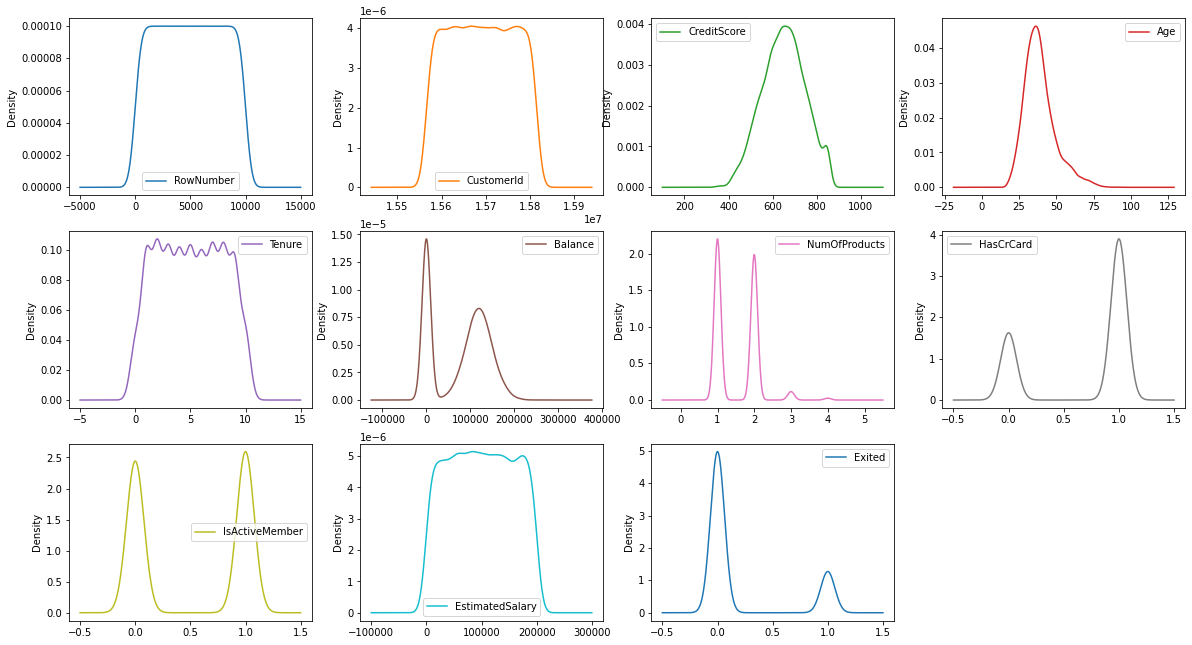

In [ ]:
# Density plots for all attributes to visualize the distribution of each attribute
df.plot(kind='density', subplots=True, layout=(4,4), figsize=(20, 15), sharex=False)
plt.show()

## Checking Missing Value

In [ ]:
print(df.isnull().sum())
print(df.shape)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
(10000, 14)


Dari pengecekan missing value dalam dataset, dapat dilihat ouput 0 menunjukkan bahwa tidak ada missing value di semua variable.

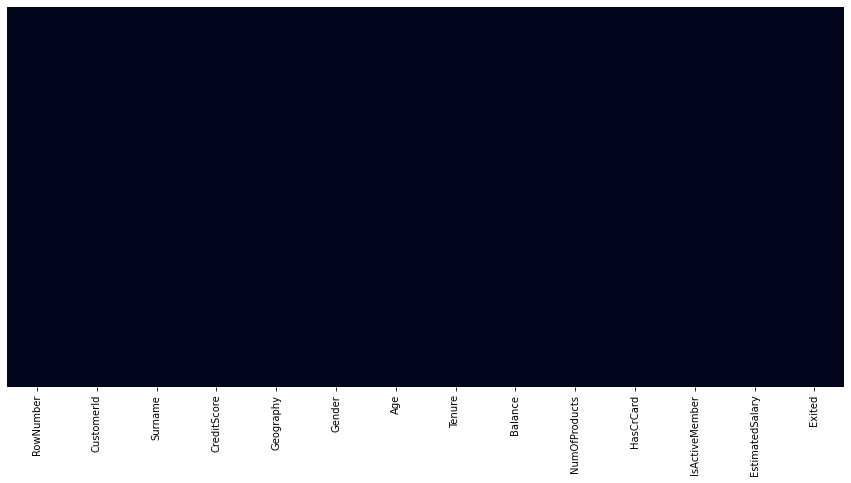

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

Dari pengecekan missing value dalam dataset, dapat dilihat ouput 0 menunjukkan bahwa tidak ada missing value di semua variable.

### Check for imbalance for categorical data

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Output diatas menunjukkan banyaknya unique value dari variable Geography dengan 3 jenis Geography yang berbeda yaitu France, Germany, Spain.

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Output diatas menunjukkan banyaknya unique value dari variable Gender dengan 2 macam Gennder yang berbeda yaitu Male dan Female.

In [ ]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

Output diatas menunjukkan banyaknya unique value dari variable HasCrCard dengan 2 macam nilai yang berbeda yaitu, 1 berarti memiliki CrCard dan 0 tidak memiliki CrCard.

In [ ]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

Output diatas menunjukkan banyaknya unique value dari variable HasCrCard dengan 2 macam nilai yang berbeda yaitu, 1 berarti memiliki CrCard dan 0 tidak memiliki CrCard.

# Data Description

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Dari output diatas, dapat dilihat jumlah dari data yang ada, nilai rata-rata, standar deviasi, nilai minimal,
nilai q1 (kuartil bawah), median (q2), nilai q3 (kuartil atas), nilai maksimum dari tiap variable dalam dataset.

- Terdapat 10000 baris pada setiap kolom.
- Maksimum EstimatedSalary nya 199992.48, dan minimum EstimatedSalary nya 51002.11.
- Customer paling muda adalah 18 tahun, dan paling tua 92 tahun.
- Maksimum Balance dari tiap customer adalah 250898.09 dan miminum Balance nya 0.
- Pada kolom exited -> 0 artinya customer tidak meninggalkan bank (not churn), 1 artinya meninggalkan bank (churn).


In [ ]:
df.groupby('Exited').mean()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,
0,5024.694964,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,4905.917526,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


- Notes : 0 artinya not churn customer, dan 1 artinya churn customer.
- Rata-rata not churn customer berusia 37 tahun, dan churn customer berusia 44 tahun.
- Rata rata not churn customer credit score nya 652 sedangkan churn customer credit score nya 645.
- Rata-rata not churn customer, dan churn customer menjadi client bank selama 5 tahun.
- Rata-rata balance not churn customer 72745 dan balance churn customer 91108

In [ ]:
continuous = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
categorical = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

print('Continuous: ', ', '.join(continuous))
print('Categorical: ', ', '.join(categorical))

Continuous:  Age, CreditScore, Balance, EstimatedSalary
Categorical:  Geography, Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember


Di atas merupakan continous, dan categorical variable.


## Exited

In [ ]:
Not_Churn = df["Exited"].value_counts()[0]
Churn = df["Exited"].value_counts()[1]

print("Not Churn Customer:", Not_Churn)
print("Churn Customer:", Churn)

Not Churn Customer: 7963
Churn Customer: 2037


- Terdapat 7963 not churn customer, dan 2037 churn customer

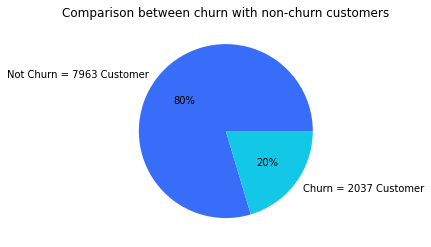

In [ ]:
data = [7963,2037]
labels = ['Not Churn = 7963 Customer', 'Churn = 2037 Customer']

colors = sns.color_palette('rainbow')[0:5]
plt.title("Comparison between churn with non-churn customers")
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Dari 100 persen customer, customer yang churn adalah 20%, dan customer not churn adalah 80%.

## Continuous Variable : Age, Balance, CreditScore, EstimatedSalary

### Age

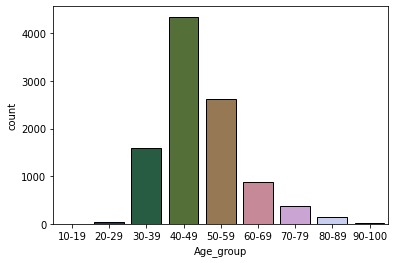

In [ ]:
kelompok_umur = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']
df['Age_group'] = pd.cut(df.Age, range(0, 93, 10), right = False, labels = kelompok_umur)

sns.countplot(x ='Age_group',data = df, palette='cubehelix', edgecolor='k')

- Customer paling banyak berada di usia 40-49 dimana terdapat sekitar 4000 lebih customer.
- Lalu yang kedua paling banyak berada di usia 50-59 tahun dimana terdapat sekitar lebih dari 2500 customer.
- Paling sedikit customer berada di usia 90 -100 tahun, dan 20-29 tahun.

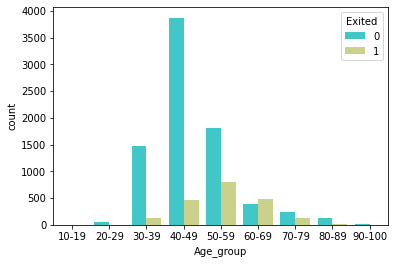

In [ ]:
sns.countplot(x='Age_group', data = df, palette="rainbow", hue='Exited')

- Not churn customer paling banyak di usia 40-49 tahun, dan churn customer paling banyak di usia 50-59 tahun.
- Pada usia 60-69 tahun churn customer lebih banyak dari pada not churn customer.

### CreditScore

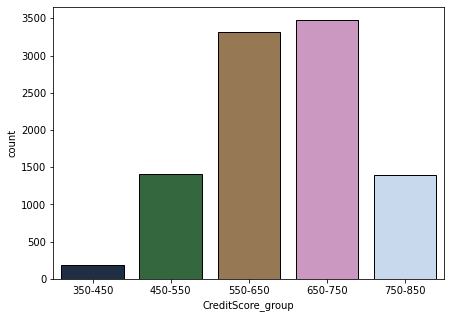

In [ ]:
credit_score_x = ['350-450', '450-550', '550-650', '650-750', '750-850']
df['CreditScore_group'] = pd.cut(df.CreditScore, range(350, 851, 100), right = False, labels = credit_score_x)
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x ='CreditScore_group',data = df, palette='cubehelix', edgecolor='k',ax=ax)


- Angka credit score tertinggi adalah 850, dan customer yang mempunyai 750-850 credit score adalah sekitar 1400 customer.
- Customer yang mempunyai 350-450 credit score ada sekitar 150 customer (paling sedikit).
-  Customer yang mempunyai 650-750 credit score ada sekitar 3400 customer (paling banyak).

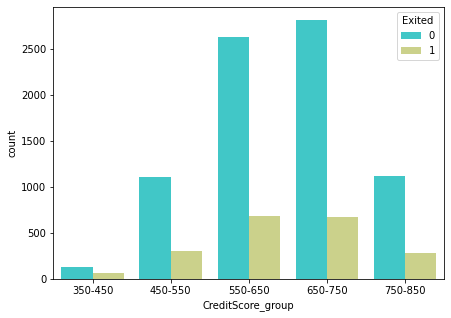

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='CreditScore_group', data = df, palette="rainbow", hue='Exited', ax=ax)

- Churn customer paling tinggi terdapat pada customer yang mempunyai credit score 550-650 tetapi not churn customernya juga kedua tertinggi dimana ada sekitar 2500 lebih yang mempunyai credit score 550-650.
- Not churn customer paling tinggi terdapat pada customer yang mempunyai credit score 650-750 dimana terdapat 2650 customer lebih.

### Balance

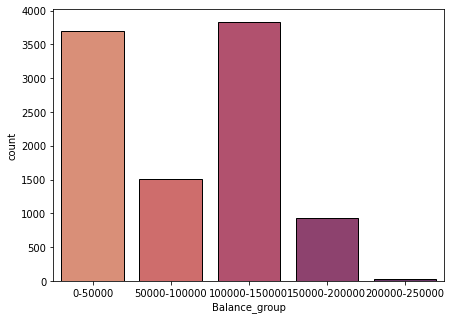

In [ ]:
balance_x = ['0-50000', '50000-100000', '100000-150000', '150000-200000', '200000-250000']
df['Balance_group'] = pd.cut(df.Balance, range(0, 250001, 50000), right = False, labels = balance_x)

fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x ='Balance_group',data = df, palette='flare', edgecolor='k',ax=ax)


- Terdapat sekitar 3750 customer yang mempunyai 100000-150000 balance (paling tinggi).
- Terdapat sekitar 10 customer yang mempunyai 200000-250000 balance (paling rendah).

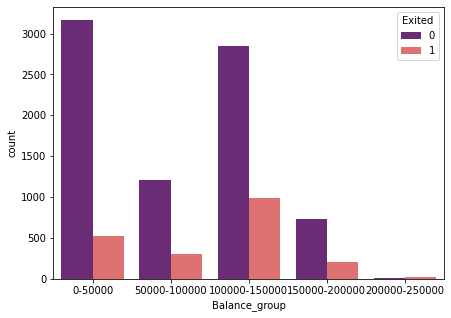

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='Balance_group', data = df, palette="magma", hue='Exited', ax=ax)


**Not Churn Customer**
- Terdapat 3000 lebih customer not churn yang mempunyai balance 50000 (paling banyak).
- Terdapat sekitar 10 customer not churn yang mempunyai balance 200000-250000 (paling sedikit).

**Churn Customer**
- Terdapat 900 lebih customer churn yang mempunyai balance 100000-150000 (paling banyak).
- Terdapat sekitar 10 customer churn yang mempunyai balance 200000-250000 (paling sedikit).


### Estimated Salary

In [ ]:
EstimatedSalary_x = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000-125000', '125000-150000', '150000-175000', '175000-200000']
df['EstimatedSalary_group'] = pd.cut(df.EstimatedSalary, range(0, 200001, 25000), right = False, labels = EstimatedSalary_x)


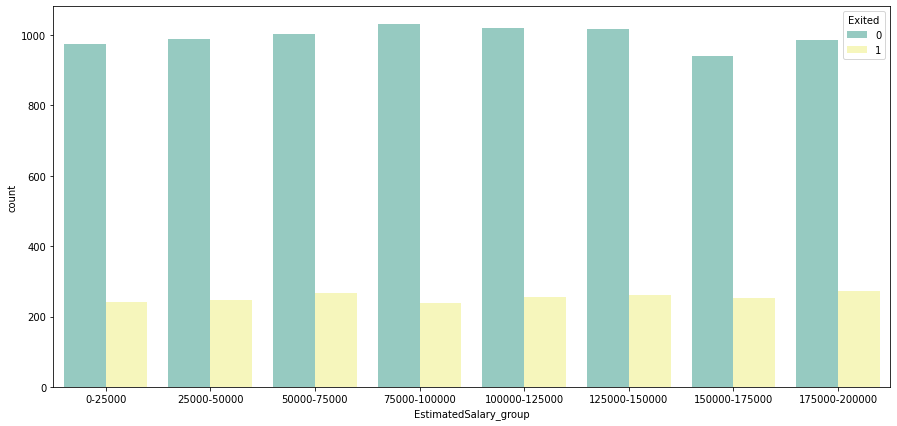

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(x='EstimatedSalary_group', data = df, palette= "Set3", hue='Exited', ax=ax)



**Not Churn Customer**
- Banyak nya customer dengan estimated salary tertentu hampir sama. Tetapi yang terbanyak adalah 75000 - 100000.

## Categorical Varaible : Geography, Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember

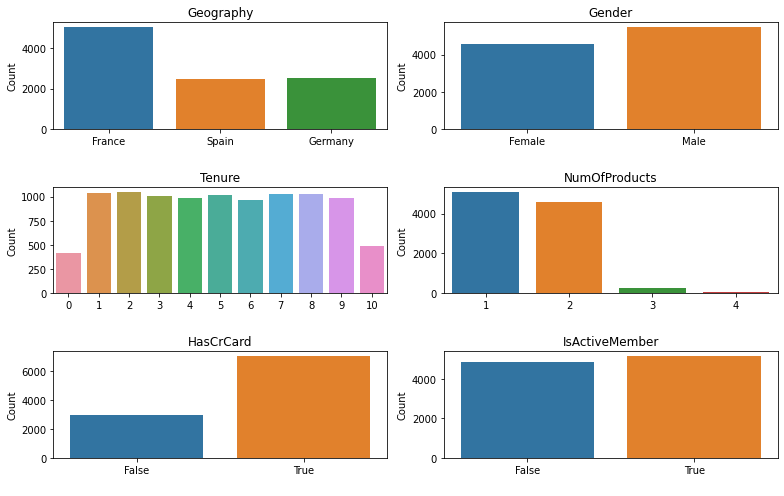

In [ ]:
from lightgbm.plotting import plot_tree
df_cat = df[categorical]

fig, ax = plt.subplots(figsize=(11, 7))

for index, column in enumerate(df_cat.columns):
    plt.subplot(3, 2, index + 1)
    sns.countplot(x=column, data=df).set(title=column)

    plt.ylabel('Count')
    plt.xlabel(" ")

    if (column == 'HasCrCard' or column == 'IsActiveMember'):
        plt.xticks([0, 1], ['False', 'True'])

plt.tight_layout();

- Customer terbanyak berasal dari France, dan paling sedikit berasal dari Germany.
- Lebih banyak customer bergender "Male" dari pada "Female".
- Produk yang dibeli customer paling banyak adalah 1, dan paling sedikit adalah 4.
- Customer kebanyakan mempunyai credit card.
- Jumlah customer yang bukan active member, dan active member hampir mirip.

### Geography

In [ ]:
df[["Geography", "Exited"]].groupby(['Geography']).mean().sort_values(by="Exited", ascending=True)

,Exited
Geography,
France,0.161548
Spain,0.166734
Germany,0.324432


France memiliki rata-rata terendah yaitu 0.161548 dan Germany paling tinggi yaitu 0.324432.

Berarti customer yang berasal dari Germany paling cepat keluar.

### Tenure

In [ ]:
df[["Tenure", "Exited"]].groupby(['Tenure']).mean().sort_values(by="Exited", ascending=True)

,Exited
Tenure,
7,0.172179
2,0.191794
8,0.192195
6,0.202689
4,0.205258
10,0.206122
5,0.206522
3,0.211100
9,0.216463


- Tenure adalah berapa tahun client menjadi customer di bank.
- Disini rata-rata tertinggi adalah 0 tahun, dan terendah 7 tahun.
- Berarti yang 0 tahun paling cepat keluar.

### Gender

In [ ]:
df[["Gender", "Exited"]].groupby(['Gender']).mean().sort_values(by="Exited", ascending=True)

,Exited
Gender,
Male,0.164559
Female,0.250715


Rata-rata gender terendah adalah male, dan tertinggi adalah Female. Ini berarti gender female lebih cepat keluar dari male.

### Number of Product

In [ ]:
df[["NumOfProducts", "Exited"]].groupby(['NumOfProducts']).mean().sort_values(by="Exited", ascending=True)

,Exited
NumOfProducts,
2,0.075817
1,0.277144
3,0.827068
4,1.000000


Customer yang membeli 4 product lebih cepat keluar.

### Has Credit Card

In [ ]:
df[["HasCrCard", "Exited"]].groupby(['HasCrCard']).mean().sort_values(by="Exited", ascending=True)

,Exited
HasCrCard,
1,0.201843
0,0.208149


Customer yang tidak punya credit card lebih cepat keluar dimana rata-ratanya 0.208149.

### Active Member

In [ ]:
df[["IsActiveMember", "Exited"]].groupby(['IsActiveMember']).mean().sort_values(by="Exited", ascending=True)

,Exited
IsActiveMember,
1,0.142691
0,0.268509


Customer yang bukan active member lebih mempunyai kemungkinan lebih cepat keluar dari pada yang aktif.

# Checking Corelation

In [ ]:
df.corr(method='pearson')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


Hasil diatas menunjukkan nilai korelasi dari tiap variable yang mewakili hubungan dengan variable lainnya. Nilai 0 berarti korelasi antar variable nya rendah, sedangkan 1 berarti korelasi antar variable nya tinggi.

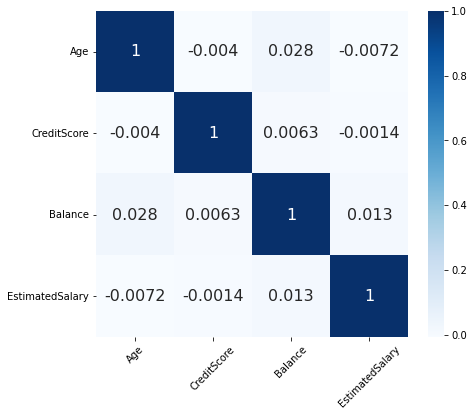

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(df[continuous].corr(),
            annot=True,
            annot_kws={'fontsize': 16},
            cmap='Blues',
            ax=ax)

ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=360);

Visualisasi plot diatas menunjukkan nilai korelasi tertinggi pada variable Balance dengan CreditScore. Hal ini berarti korelasi antar kedua variable saling mempengaruhi satu dan lainnya. Sedangkan, korelasi terendah ada pada variable EstimatedSalary dengan CreditScore.

# Checking Outliers

RowNumber              AxesSubplot(0.125,0.71587;0.168478x0.16413)
CustomerId          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
CreditScore         AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Age                 AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Tenure                AxesSubplot(0.125,0.518913;0.168478x0.16413)
Balance            AxesSubplot(0.327174,0.518913;0.168478x0.16413)
NumOfProducts      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
HasCrCard          AxesSubplot(0.731522,0.518913;0.168478x0.16413)
IsActiveMember        AxesSubplot(0.125,0.321957;0.168478x0.16413)
EstimatedSalary    AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Exited             AxesSubplot(0.529348,0.321957;0.168478x0.16413)
dtype: object

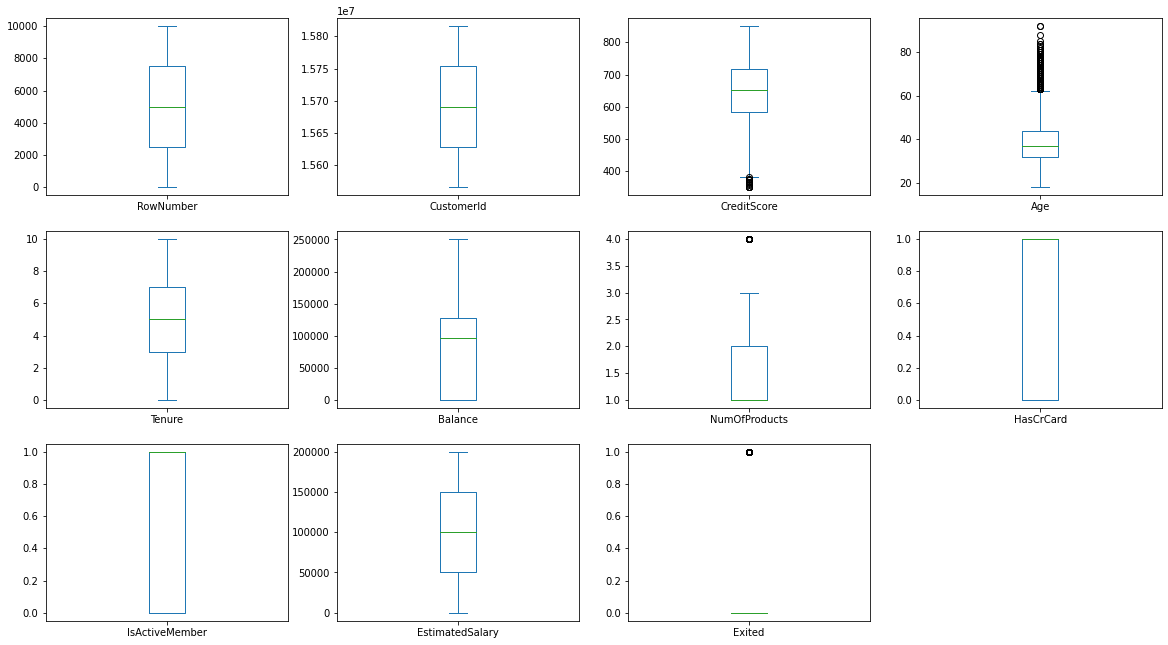

In [ ]:
df.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,15))

Terdapat outliers pada CreditScore, Age, NumOfProducts tetapi ini represent natural variations di populasi. Jadi tidak perlu dihapus.

# Data Preprocessing

## Feature Selection

In [ ]:
df.drop(["RowNumber", "CustomerId", "Surname", "Age_group", "EstimatedSalary_group", "CreditScore_group", "Balance_group", "EstimatedSalary"], axis=1, inplace=True)

Setelah melakukan EDA, kolom RowNumber, CustomerId, Surname, Age_group, EstimatedSalary_group, CreditScore_group,Balance_group, dan EstimatedSalary dihapus karena pengaruh nya kecil terhadap peningkatan hasil akurasi dalam prediksi.

### Are the variables statistically significant?

In [ ]:
# If p-value < 0.05 -->Significant
# If p-value > 0.05 -->Not Significant

chi2_array, p_array = [], []
for column in categorical:

    crosstab = pd.crosstab(df[column], df['Exited'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({
    'Variable': categorical,
    'Chi-square': chi2_array,
    'p-value': p_array
})
df_chi.sort_values(by='Chi-square', ascending=False)

,Variable,Chi-square,p-value
3,NumOfProducts,1503.629362,0.000000e+00
0,Geography,301.255337,3.830318e-66
5,IsActiveMember,242.985342,8.785858e-55
1,Gender,112.918571,2.248210e-26
2,Tenure,13.900373,1.775846e-01
4,HasCrCard,0.471338,4.923724e-01


Cek variable yang signifikan terhadap model yang ingin dibuat, nilai p-value < 0.05 berarti variable signifikan dan p-value > 0.05 berarti variable tidak signifikan.

In [ ]:
df.drop(['Tenure', "HasCrCard"], axis=1, inplace=True)

Berdasarkan pengecekan variable signifikan, kolom Tenure dan HasCrCard dihapus karena kurang signifikan dilihat dari nilai p-value variable nya.

## Encoding Categorical Feature

In [ ]:
df = pd.get_dummies(df, columns=["Gender"], drop_first = True)

In [ ]:
df = pd.get_dummies(df, columns=["Geography"], drop_first = True)

In [ ]:
df

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,0.00,1,1,1,0,0,0
1,608,41,83807.86,1,1,0,0,0,1
2,502,42,159660.80,3,0,1,0,0,0
3,699,39,0.00,2,0,0,0,0,0
4,850,43,125510.82,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
9995,771,39,0.00,2,0,0,1,0,0
9996,516,35,57369.61,1,1,0,1,0,0
9997,709,36,0.00,1,1,1,0,0,0
9998,772,42,75075.31,2,0,1,1,1,0


- Encoding Categorical Feature -> mengganti categorical data into binary vector representation
- Ini digunakan saat working dengan machine learning algorithms seperti decision trees and support vector machines yang hanya menerima numeric inputs.
- Nilai dalam kolom direpresentasikan sebagai 1 dan 0 seperti di atas.

## Feature Scaling

In [ ]:
#scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0,1))

select_columns = ['CreditScore', 'Age', 'Balance']
df[select_columns] = scaler.fit_transform(df[select_columns])

print('Features Scaled!')

Features Scaled!


In [ ]:
df.head()

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,0.538,0.324324,0.000000,1,1,1,0,0,0
1,0.516,0.310811,0.334031,1,1,0,0,0,1
2,0.304,0.324324,0.636357,3,0,1,0,0,0
3,0.698,0.283784,0.000000,2,0,0,0,0,0
4,1.000,0.337838,0.500246,1,1,0,0,0,1


# Creating a Train and Test Set

In [ ]:
X = df.drop(["Exited"], axis=1)
y = df["Exited"]

Target variable (Y) pada modelling adalah `Exited`. Hapus kolom variable target untuk independent variable (X) agar datanya tidak mengandung kolom dari nilai yang mau diprediksi.

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

Split data modelling menjadi training dan test set dengan proporsi test set 20% dan training set 80% dari jumlah data.

In [ ]:
print('Train set: {} rows x {} columns'.format(train_df.shape[0],
                                               train_df.shape[1]))
print(' Test set: {} rows x {} columns'.format(test_df.shape[0],
                                               test_df.shape[1]))

Train set: 8000 rows x 9 columns
 Test set: 2000 rows x 9 columns


Lihat dimensi dari training set dan test set yang sudah dibuat. Ada 8000 baris dan 9 kolom training set. Untuk test set, berisi 2000 baris dan 9 kolom data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Exited',axis=1),
                                                    df['Exited'], test_size=0.2,
                                                    random_state=42)

Split data menjadi 4 bagian. Ada training dan test set pada depedent variable (Y). Ada training dan test set pada independent variable (X). Hapus kolom target variable, yaitu `Exited` pada training dan test set yang berada di independent variable (X).

In [ ]:
print('Train set: {} rows x {} columns'.format(X_train.shape,
                                               y_train.shape))

Train set: (8000, 8) rows x (8000,) columns


Terdapat 8000 baris dan 8 kolom pada training set independent variable (X). Sedangkan, ada 8000 baris dan 1 kolom pada training set pada dependent variable (Y).

In [ ]:
over = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = over.fit_resample(X_train, y_train)

y_train.value_counts()

0    6356
1    6356
Name: Exited, dtype: int64

Ada 6356 baris data pada target variable. Terdapat 2 nilai pada target variable (Y) yaitu 0 berarti tidak meninggalkan bank dan 1 berarti meninggalkan bank.

# Building Machine Learning Models

In [ ]:
### Membuat fungsi untuk memvisualisasikan confusion matrix
def confmatrix(y_pred, title):
    cm = metrics.confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'

    plt.figure(figsize = (10,7))
    plt.title(title)

    sns.set(font_scale=1.4) # For label size
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}) # Font size

Membuat fungsi untuk menampilkan confusion matrix dari hasil model machine learning menggunakan beberapa algoritma yang berbeda.

# Logistic Regression

In [ ]:
### Instantiate the Algorithm
logreg = LogisticRegression()

### Train/Fit the model
logreg.fit(X_train, y_train)

LogisticRegression()

Algoritma pertama yaitu logistic regression. Untuk menggunakan algoritmanya, inisialisasi algoritma terlebih dahulu lalu fit dengan data training X dan Y.

In [ ]:
### Predict on the test set
logreg_pred = logreg.predict(X_test)

In [ ]:
### Get performance metrics
logreg_score = metrics.accuracy_score(y_test, logreg_pred) * 100

### Print classification report
print("Classification report for {}:\n{}".format(logreg, metrics.classification_report(y_test, logreg_pred)))
print("Accuracy score:", logreg_score)

Classification report for LogisticRegression():
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1607
           1       0.39      0.72      0.51       393

    accuracy                           0.73      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.81      0.72      0.75      2000

Accuracy score: 72.5


In [ ]:
logreg_score_recall = metrics.recall_score(y_test, logreg_pred, average='weighted') * 100
logreg_score_precision = metrics.precision_score(y_test, logreg_pred, average='weighted') * 100

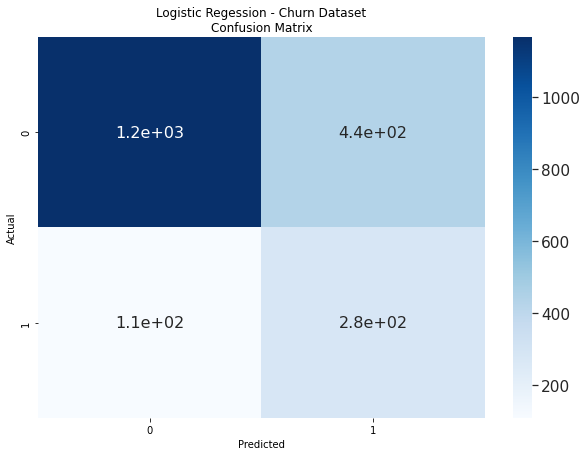

In [ ]:
### Plot the confusion matrix
confmatrix(logreg_pred, "Logistic Regession - Churn Dataset\nConfusion Matrix")

# Random Forest

In [ ]:
### Instantiate the Algorithm
ranfor = RandomForestClassifier()

### Train/Fit the model
ranfor.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
ranfor_pred = ranfor.predict(X_test)

In [ ]:
### Get performance metrics
ranfor_score = metrics.accuracy_score(y_test, ranfor_pred) * 100

### Print classification report
print("Classification report for {}:\n{}".format(ranfor, metrics.classification_report(y_test, ranfor_pred)))
print("Accuracy score:", ranfor_score)

Classification report for RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1607
           1       0.57      0.65      0.61       393

    accuracy                           0.83      2000
   macro avg       0.74      0.76      0.75      2000
weighted avg       0.84      0.83      0.84      2000

Accuracy score: 83.45


In [ ]:
ranfor_score_recall = metrics.recall_score(y_test, ranfor_pred, average='weighted') * 100
ranfor_score_precision = metrics.precision_score(y_test, ranfor_pred, average='weighted') * 100

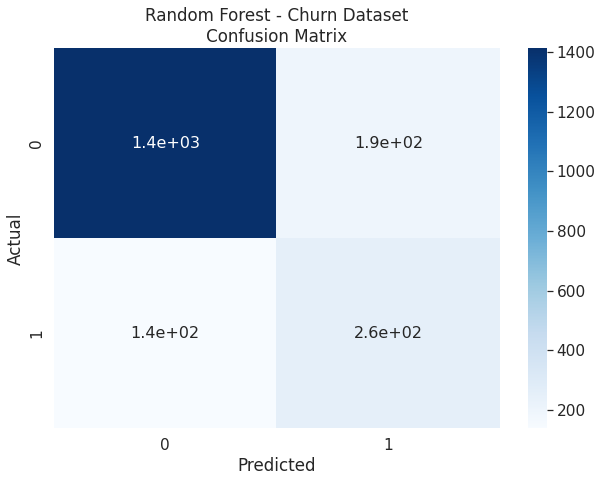

In [ ]:
### Plot the confusion matrix
confmatrix(ranfor_pred, "Random Forest - Churn Dataset\nConfusion Matrix")

# Gaussian Naive Bayes

In [ ]:
### Instantiate the Algorithm
gnb = GaussianNB()

### Train the model
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
### Predict on the Test Set
gnb_pred = gnb.predict(X_test)

In [ ]:
### Get performance metrics
gnb_score = metrics.accuracy_score(y_test, gnb_pred) * 100

### Print classification report
print("Classification report for {}:\n{}".format(gnb, metrics.classification_report(y_test, gnb_pred)))
print("Accuracy score:", gnb_score)

Classification report for GaussianNB():
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1607
           1       0.40      0.70      0.51       393

    accuracy                           0.74      2000
   macro avg       0.66      0.72      0.67      2000
weighted avg       0.81      0.74      0.76      2000

Accuracy score: 73.75


In [ ]:
gnb_score_recall = metrics.recall_score(y_test, gnb_pred, average='weighted') * 100
gnb_score_precision = metrics.precision_score(y_test, gnb_pred, average='weighted') * 100

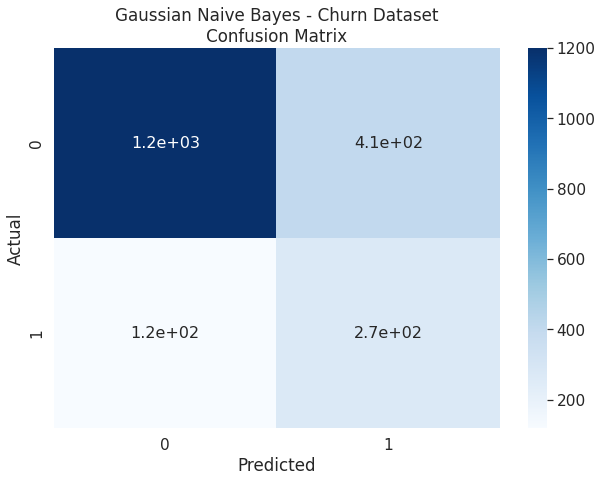

In [ ]:
### Plot the confusion matrix
confmatrix(gnb_pred, "Gaussian Naive Bayes - Churn Dataset\nConfusion Matrix")

# LGBM Classifier

In [ ]:
### Instantiate the Algorithm
lgbm = LGBMClassifier()

### Train the model
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
### Predict on the Test Set
lgbm_pred = lgbm.predict(X_test)

In [ ]:
### Get performance metrics
lgbm_score = metrics.accuracy_score(y_test, lgbm_pred) * 100

### Print classification report
print("Classification report for {}:\n{}".format(lgbm, metrics.classification_report(y_test, lgbm_pred)))
print("Accuracy score:", lgbm_score)

Classification report for LGBMClassifier():
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1607
           1       0.65      0.62      0.63       393

    accuracy                           0.86      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.86      0.86      0.86      2000

Accuracy score: 86.0


In [ ]:
lgbm_score_recall = metrics.recall_score(y_test, lgbm_pred, average='weighted') * 100
lgbm_score_precision = metrics.precision_score(y_test, lgbm_pred, average='weighted') * 100

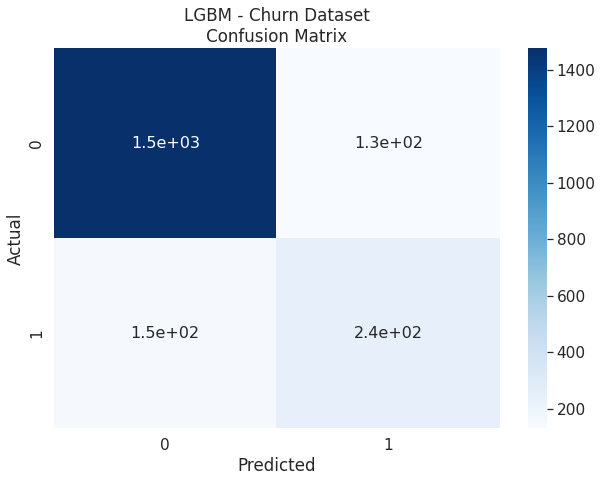

In [ ]:
### Plot the confusion matrix
confmatrix(lgbm_pred, "LGBM - Churn Dataset\nConfusion Matrix")

# Evaluasi Model

Pada mulanya kami membandingkan kinerja/performance model klasifikasi yang telah kami buat kedalam lima metrik individu yakni akurasi, nilai F1 cross validation, recall, presisi, serta area dibawah kurva ROC atau disebut sebagai AUC.

In [ ]:
df_results = pd.DataFrame.from_dict({
    'Accuracy Score':{'Logistic Regression':logreg_score, 'Gaussian Naive Bayes':gnb_score, 'Random Forest':ranfor_score, 'LGBM Classifier':lgbm_score},
    'Recall Score':{'Logistic Regression':logreg_score_recall, 'Gaussian Naive Bayes':gnb_score_recall, 'Random Forest':ranfor_score_recall, 'LGBM Classifier':lgbm_score_recall},
    'Precision Score':{'Logistic Regression':logreg_score_precision, 'Gaussian Naive Bayes':gnb_score_precision, 'Random Forest':ranfor_score_precision, 'LGBM Classifier':lgbm_score_precision}
    })
df_results.style.highlight_max(color="indianred", axis=0)

,Accuracy Score,Recall Score,Precision Score
Logistic Regression,72.500000,72.500000,81.120194
Gaussian Naive Bayes,73.750000,73.750000,81.024120
Random Forest,83.450000,83.450000,84.390187
LGBM Classifier,86.000000,86.000000,85.743669


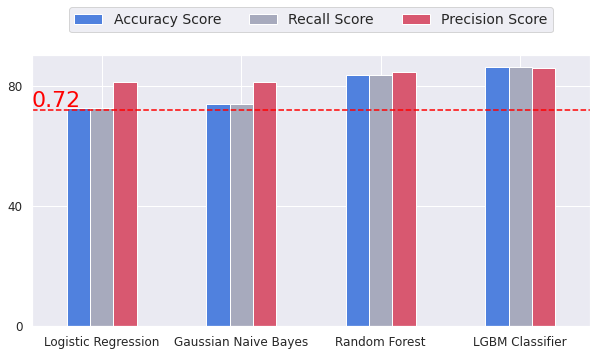

In [ ]:
df_results.plot(kind='bar',
                   figsize=(10, 5),
                   fontsize=12,
                   color=['#5081DE', '#A7AABD', '#D85870', '#424656', '#FF81C0', '#DA70D6'])

plt.legend(loc='upper center',
           fontsize=20 - 6,
           ncol=len(df_results.columns),
           bbox_to_anchor=(0.5, 1.2))
plt.xticks(rotation=0)
plt.yticks([0, 40, 80])

plt.axhline(y=72, color='red', linestyle='--')
plt.text(x=-0.5, y=73, s='0.72', size=20 + 2, color='red');

Perlu diingat bahwa dataset ini memiliki proposi target yang kurang imbang. Nilai 0 pada target "Exited" jauh lebih banyak ketimbang 1 pada kolom yang sama dan oleh karena itu, kita tidak akan terlalu memperhatikan metrics accuracy untuk mengukur performance model yang telah dibuat. Kita akan melihat metrics lain yang cocok digunakan untuk data <i>imbalance<i/> mengukur performance model dari presisi serta akurasi.

Semua model pengklasifikasi yang kami buat memiliki nilai Recall lebih dari 72%. LGBM Classifier merupakan model yang memiliki nilai Recall paling tinggi diantara keempat model (86%). Secara keseluruhan LGBM Classifier memiliki performance yang paling baik dalam hal akurasi, recall, maupun presisi.

# Feature Importance

Beberapa algoritma dapat memberikan list atribut yang dianggap penting dalam permodelan. Feature Importance mewakili skor setiap fitur, dimana skor yang lebih tinggi berarti bahwa fitur tersebut akan memiliki efek yang lebih besar pada model yang digunakn untuk memprediksi variable terntentu (dalam hal ini target variabel kita yakni "Exited"). Berikut merupakan beberapa feature importance dari masing-masing algoritma:

## Logistic Regression

In [ ]:
w0 = logreg.intercept_[0]
w1, w2, w3, w4, w5, w6, w7, w8 = logreg.coef_[0]
w = [w1, w2, w3, w4, w5, w6, w7, w8]
feature_names = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember',
       'Gender_Male', 'Geography_Germany', 'Geography_Spain']
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, np.array(w))
feature_importance.sort_values(by="importance", ascending=False)

,feature,importance
1,Age,414.061165
6,Geography_Germany,2.171957
2,Balance,1.910331
7,Geography_Spain,1.143665
3,NumOfProducts,0.902688
0,CreditScore,0.672564
5,Gender_Male,0.569309
4,IsActiveMember,0.401723


Pada algoritma logistic regression, 3 attribut teratas yang dianggap penting ialah usia, geografi(German), dan Balance.

## Random Forest

In [ ]:
importances = ranfor.feature_importances_
feature_names = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember',
       'Gender_Male', 'Geography_Germany', 'Geography_Spain']
forest_importances = pd.DataFrame(importances, index=feature_names)

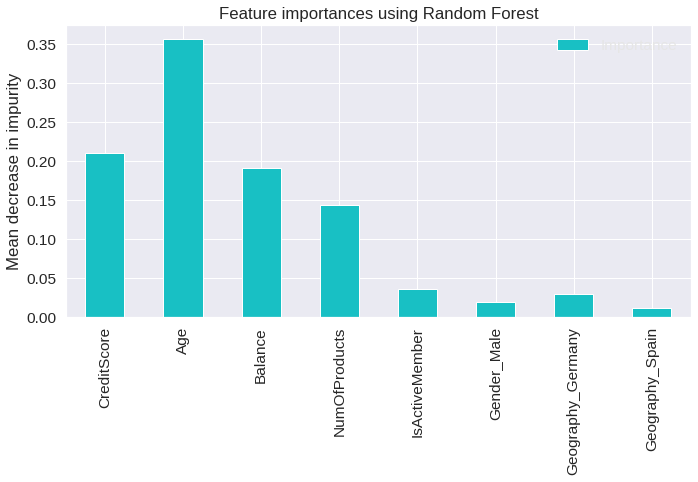

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
forest_importances.plot.bar(ax=ax)
plt.legend(["Importance"])
ax.set_title("Feature importances using Random Forest")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Mirip dengan algoritma logistic Regression, algoritma random forest memiliki 3 atribut terpenting yakni age, balance, dan creditscore.

## LGBM Classifier

Text(0.5, 1.0, 'Feature Importance For LGBM Classifiers')

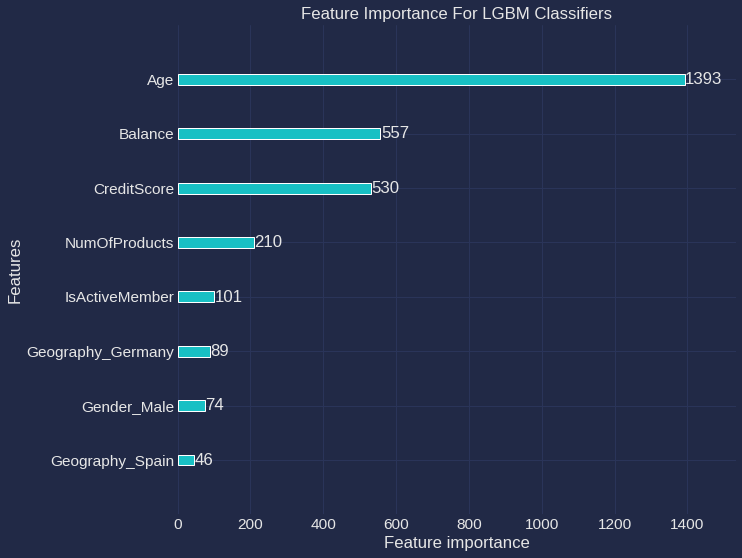

In [ ]:
plot_importance(lgbm, figsize=(10, 9));
plt.title("Feature Importance For LGBM Classifiers")

Algoritma LGBM Classifier memiliki kemiripan dengan Random Forest, dimana 3 atribut yang dianggap paling berpengaruh ialah age, balance, dan creditscore.

# Kesimpulan

Tujuan dari pengerjaan dataset ini ialah membuat klasifikasi yang tepat untuk "Churn Dataset", apakah seseorang akan bertahan atau meninggalkan sebuah perusahaan bank. Hal ini dilakukan dengan membuat model dengan memperhatikan skor metrik individu seperti f1, recall, precision, maupun ROC-AUC. Beberapa tugas yang telah kami kerjakan pada notebook ini adalah:
1. Membaca dan memahami Churn Dataset
2. Melakukan eksplorasi data mulai dari mengimport data hingga melakukan visualisasi agar mendapat gambaran tentang dataset ini.
3. Membuat empat macam klasifikasi menggunakan algoritma logistic regression, random forest, gauisian naive bayes, serta LGBM classifier.
4. Hasil: model terbaik didapat dari algoritma LGBM classifier dengan nilai Recall sebesar 86% dan akurasi sebesar 86%

Kami telah mencoba beberapa feature engineering termasuk melakukan scaling minmax maupun standard scaler akan tetapi hal ini tidak meningkatkan performa prediksi model kami. Diperlukan analisis lebih mendalam dan optimasi algoritma agar didapatkan hasil yang lebih akurat dan memuaskan.